In [1]:
import numpy as np
# np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.20f}'.format})
from scipy.stats import norm
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
from scipy.stats import f
from sklearn.preprocessing import normalize
import random
# pd.set_option('display.float_format', '{:.20f}'.format)
# np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.20f}'.format})
# sys.float_repr = lambda x: format(x, '.20f')
import warnings
from helpers import *

def create_Z(n, k, p, rho, sig):
    # Create X as an n x k standard Gaussian matrix
    X = np.random.randn(n, k)
    
    #Normalize X
    X = X / np.linalg.norm(X,axis=0)
    
    
    # Create B as a random k x (p-k) matrix
    B = np.random.randn(k, p-k)
    
    # Normalize B such that its l1 matrix norm is rho
    B = normalize(B, axis=0, norm='l2') * rho
    
    # Create W as an n x (p-k) Gaussian matrix
    W = np.random.randn(n, p-k)
    
    # Calculate X B 
    XB = X @ B 

    # Calculate Y = X B + sig*W with normalized XB
    # Y = XB/ np.linalg.norm(XB ,axis=0)  + sig*W
    Y = XB + sig*W
    # Calculate Z = [X  Y] (column concatenation of X and Y)
    Z = np.hstack((X, Y))

    
    Z = Z / np.linalg.norm(Z,axis=0)
    
    
    return Z


In [2]:
knum=5
def Final(i,p):
   Unionset = []
   df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/600_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
   df =df.drop('Unnamed: 0',axis=1)
   Z = np.array(df,dtype = 'float64')
   print(compute_k_truncated_Z(Z,knum)[-1])
   # unionset = choose_factor('SGL', Z, knum, train_size=600, svd_C = 1, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = compute_k_truncated_Z(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset


In [5]:

df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/600_'+str(100)+'_5Xfull'+str(46+1)+'.csv')
df =df.drop('Unnamed: 0',axis=1)
Z = np.array(df,dtype = 'float64')
Z[Final(68,125),Final(68,125)]

array([-0.01151393,  0.01981881,  0.0988895 ])

In [ ]:
n = 100
plist = [15,25,35,45,55]
# knum = 4
knum = 5
N_simulations = 100
true_set = [0,1,2,3,4]

Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
   df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
   df =df.drop('Unnamed: 0',axis=1)
   Z = np.array(df,dtype = 'float64')
   
   unionset = choose_factor('SGL', Z, knum, train_size=300, svd_C = compute_k_truncated_svd(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset) 
        Final_knum.append(len(unionset))
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 100, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_100_5_sgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



Counter({2: 99, 3: 99, 1: 99, 4: 98, 0: 51, 7: 5, 22: 5, 17: 4, 21: 4, 8: 3, 13: 3, 16: 3, 24: 3, 11: 2, 14: 2, 20: 2, 9: 2, 15: 1, 12: 1, 5: 1, 10: 1, 19: 1, 23: 1, 6: 1})
selected factor size: 4.91 CP: 0.51 CF: 0.42 TR: 0.892 FR: 0.045 F1: 0.902694
(4.91, 0.51, 0.42, 0.892, 0.045, 0.902694)
Counter({2: 100, 4: 100, 1: 100, 3: 100, 0: 97, 7: 1, 33: 1, 21: 1, 31: 1, 20: 1})
selected factor size: 5.02 CP: 0.97 CF: 0.93 TR: 0.994 FR: 0.003 F1: 0.99396
(5.02, 0.97, 0.93, 0.994, 0.003, 0.99396)
Counter({4: 100, 2: 100, 3: 100, 1: 100, 0: 99, 11: 1})
selected factor size: 5.0 CP: 0.99 CF: 0.98 TR: 0.998 FR: 0.001 F1: 0.99798
(5.0, 0.99, 0.98, 0.998, 0.001, 0.99798)
Counter({4: 100, 2: 100, 3: 100, 1: 100, 0: 100})
selected factor size: 5.0 CP: 1.0 CF: 1.0 TR: 1.0 FR: 0.0 F1: 1.0
(5.0, 1.0, 1.0, 1.0, 0.0, 1.0)
Counter({4: 100, 3: 100, 2: 100, 1: 100, 0: 100})
selected factor size: 5.0 CP: 1.0 CF: 1.0 TR: 1.0 FR: 0.0 F1: 1.0
(5.0, 1.0, 1.0, 1.0, 0.0, 1.0)


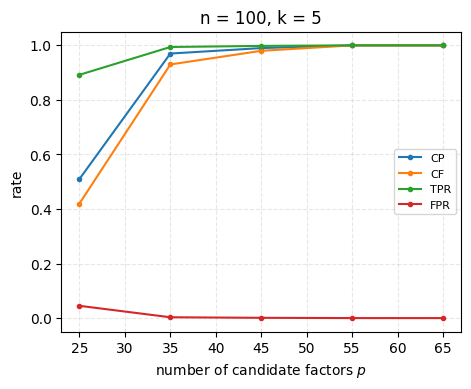

In [21]:
n = 100
plist = [25,35,45,55,65]
# knum = 4
knum = 5
N_simulations = 100
true_set = [0,1,2,3,4]
rho=1
sig=0.3
Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
#    df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
#    df =df.drop('Unnamed: 0',axis=1)
   
   Z = np.array(df,dtype = 'float64')
   Z = create_Z(n, knum, p, rho, sig)
   unionset = choose_factor('TSMS', Z, knum, train_size=300, svd_C = compute_k_truncated_svd(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.15) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset) 
        if not unionset:
            length=0
        else:
            length=len(unionset)
        Final_knum.append(length)
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 100, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_100_5_tsms.pdf',dpi=600,format='pdf',bbox_inches="tight")



# DGL

In [4]:
def compute_svd_C(Z, k):
    """
    Compute the k-truncated SVD of the matrix Z.
    
    Parameters:
    - Z: numpy array of shape (m, n)
    - k: int, number of singular values to consider
    
    Returns:
    - Zk: numpy array, k-truncated approximation of Z
    - svd_C: float, the sum of l2 norms of rows of Theta_tru
    """
    
    # Compute the k-truncated SVD of Z
   
    Zk =Z[:, :k]

    # Invert Sk @ Vk
    Theta_tru = np.linalg.inv(Z.T@Z)@Z.T @ Zk
    svd_C = cp.sum(cp.norm(Theta_tru, 2, axis=1)).value
    
    return svd_C

In [ ]:
n = 300
knum = 10
plist =  [30, 50, 70, 90, 110]

N_simulations = 100
true_set = [0,1,2,3,4,5,6,7,8,9]
rho = 1
sig =0.3
Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
#    df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
#    df =df.drop('Unnamed: 0',axis=1)
#    Z = np.array(df,dtype = 'float64')
   Z = create_Z(n, knum, p, rho, sig)
   unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = compute_svd_C(Z,knum), asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset[0]) 
        Final_knum.append(len(unionset[0]))
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 300, k = 10')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_300_10_dgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



In [ ]:
# n = 300
# knum = 5
plist = [25, 35, 45, 55, 65]

N_simulations = 100
true_set = [0,1,2,3,4]
rho = 1
sig =0.3
Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
   np.random.seed(i)
   random.seed(i)
#    df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
#    df =df.drop('Unnamed: 0',axis=1)
#    Z = np.array(df,dtype = 'float64')
   Z = create_Z(n, knum, p, rho, sig)
   unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = compute_svd_C(Z,knum), asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset[0]) 
        Final_knum.append(len(unionset[0]))
        
    result=evaluate(num_chosen_set,N_simulations,knum,p) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 300, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_300_5_dgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



In [ ]:
from helpers import *
n = 600
knum = 5
plist = [30, 50, 70, 90, 110]

N_simulations = 100
true_set = [0,1,2,3,4]
rho = 1
sig =0.3
Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
#    df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
#    df =df.drop('Unnamed: 0',axis=1)
#    Z = np.array(df,dtype = 'float64')
   np.random.seed(i)
   random.seed(i)
   Z = create_Z(n, knum, p, rho, sig)
   unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = compute_svd_C(Z,knum), asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset[0]) 
        Final_knum.append(len(unionset[0]))
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 600, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_600_5_dgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



In [ ]:
n = 600
knum = 10
plist = [30, 50, 70, 90, 110, 130, 150]

N_simulations = 100
true_set = [0,1,2,3,4,5,6,7,8,9]
rho = 1
sig =0.3
Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
   np.random.seed(i)
   random.seed(i)
#    df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
#    df =df.drop('Unnamed: 0',axis=1)
#    Z = np.array(df,dtype = 'float64')
   Z = create_Z(n, knum, p, rho, sig)
   unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = compute_svd_C(Z,knum), asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset[0]) 
        Final_knum.append(len(unionset[0]))
        
    result=evaluate(num_chosen_set,N_simulations,knum,p) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 600, k = 10')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_600_10_dgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



In [ ]:
n = 50
knum = 5
plist = [15, 25, 35, 45, 50]

N_simulations = 100
true_set = [0,1,2,3,4]
rho = 1
sig =0.3
Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
   np.random.seed(i)
   random.seed(i)
#    df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
#    df =df.drop('Unnamed: 0',axis=1)
#    Z = np.array(df,dtype = 'float64')
   Z = create_Z(n, knum, p, rho, sig)
   unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C =compute_svd_C(Z,knum), asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset[0]) 
        Final_knum.append(len(unionset[0]))
        
    result=evaluate(num_chosen_set,N_simulations,knum,p) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 50, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_50_5_dgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



Counter({4: 98, 3: 93, 2: 91, 0: 90, 1: 88, 26: 1, 33: 1, 10: 1, 23: 1, 24: 1})
selected factor size: 4.65 CP: 0.68 CF: 0.65 TR: 0.92 FR: 0.001667 F1: 0.948828
(4.65, 0.68, 0.65, 0.92, 0.001667, 0.948828)
Counter({0: 97, 4: 97, 3: 96, 2: 93, 1: 92, 42: 1, 17: 1, 13: 1, 22: 1})
selected factor size: 4.79 CP: 0.8 CF: 0.77 TR: 0.95 FR: 0.001 F1: 0.966995
(4.79, 0.8, 0.77, 0.95, 0.001, 0.966995)
Counter({3: 100, 4: 99, 1: 98, 0: 95, 2: 95})
selected factor size: 4.87 CP: 0.87 CF: 0.87 TR: 0.974 FR: 0.0 F1: 0.985556
(4.87, 0.87, 0.87, 0.974, 0.0, 0.985556)
Counter({4: 100, 3: 100, 2: 99, 1: 99, 0: 99})
selected factor size: 4.97 CP: 0.97 CF: 0.97 TR: 0.994 FR: 0.0 F1: 0.996667
(4.97, 0.97, 0.97, 0.994, 0.0, 0.996667)
Counter({2: 100, 1: 100, 3: 100, 4: 100, 0: 99})
selected factor size: 4.99 CP: 0.99 CF: 0.99 TR: 0.998 FR: 0.0 F1: 0.998889
(4.99, 0.99, 0.99, 0.998, 0.0, 0.998889)


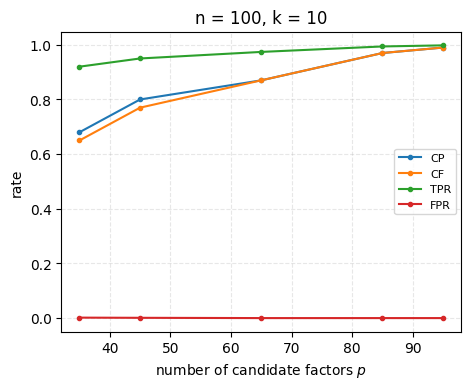

In [120]:

n = 100
knum = 5
plist = [35, 45, 65, 85,95]

N_simulations = 100
true_set = [0,1,2,3,4,5,6,7,8,9]
rho = 1
sig =0.3
Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
#    df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
#    df =df.drop('Unnamed: 0',axis=1)
#    Z = np.array(df,dtype = 'float64')
   np.random.seed(i)
   random.seed(i)
   Z = create_Z(n, knum, p, rho, sig)
   unionset = choose_factor('SGL', Z, knum, train_size=600, svd_C = compute_svd_C(Z,knum), asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 

#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset[0]) 
        Final_knum.append(len(unionset[0]))
        
    result=evaluate(num_chosen_set,N_simulations,knum,p) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 100, k = 10')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_100_10_dgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



In [117]:
# def PRESS_statistic(r, X):

#     # Compute regression coefficients
#     beta = np.linalg.inv(X.T @ X) @ X.T @ r

#     # Compute residuals
#     residuals =(r - X @ beta)[:, np.newaxis]

#     # Compute the hat matrix
#     H = X @ np.linalg.inv(X.T @ X) @ X.T

#     # Compute the PRESS residuals
#     h_diag = np.diag(H)[:, np.newaxis]  # make it a column vector for broadcasting
#     PRESS = residuals / 1 - h_diag

#     # Compute the PRESS statistic for each response variable
#     PRESS_stat = np.sum(PRESS**2)
#     R= np.sum((r-np.mean([np.setdiff1d(r,i) for i in range(r.shape[0])]))**2, axis=0)
  
#     # Return the average PRESS statistic
#     # return PRESS_stat/X.shape[1]
#     return (PRESS_stat/R)

def PRESS_statistic(r, X):
    """
    Compute the average PRESS statistic of the regression of r on X.

    Parameters
    ----------
    r : np.ndarray
        Dependent variable matrix. Each column is a different response variable.
    X : np.ndarray
        Independent variable matrix.

    Returns
    -------
    float
        Average PRESS statistic across all response variables.
    """
    # Compute regression coefficients
    beta = np.linalg.inv(X.T @ X) @ X.T @ r

    # Compute residuals
    residuals =( r - X @ beta)[:, np.newaxis]

    # Compute the hat matrix
    H = X @ np.linalg.inv(X.T @ X) @ X.T

    # Compute the PRESS residuals
    h_diag = np.diag(H)[:, np.newaxis]  # make it a column vector for broadcasting
    PRESS = residuals / (1 - h_diag)
    # R= np.sum((r-np.mean([np.setdiff1d(r,i) for i in range(r.shape[0])]))**2, axis=0)
  
    # Compute the PRESS statistic for each response variable
    PRESS_stat = np.sum(PRESS**2)

    # Return the average PRESS statistic
    return PRESS_stat
def chosen_set_with_press(Gammavalue,nonzero,Znorm):
    n,p= Znorm.shape
    chosen_set = list(np.argsort(-np.round(cp.norm(Gammavalue, 2, axis=1).value,6))[:nonzero])
    hand_ssr = np.mean([PRESS_statistic(Znorm[:,i],Znorm[:,chosen_set]) for i in np.setdiff1d(range(p),chosen_set)])
    # hand_ssr = np.mean([PRESS_statistic(Znorm[:,i],Znorm[:,chosen_set]) for i in np.setdiff1d(range(p),chosen_set)])
    return chosen_set,hand_ssr

def choose_factor(method, Z, Knum, train_size=600, svd_C = None, asset= [[None]], fix_true = None,fix_false = None,hyper_p = None):
   
    Z = Z[:train_size]
    Znorm = normalize_columns(Z)
    n, p = Z.shape
    # SVD Z and define the knum principal components
    Handssr = []
 
    if method == 'DGL':
        
        chosen_set =[]
        # Znorm = Z
        knum_list = np.array([Knum-2,Knum-1,Knum,Knum+1,Knum+2])
        # knum_list = np.array([Knum])
        svd_C_list = np.linspace(0, svd_C, 10)
        # svd_C_list = np.array([svd_C])

        SSR = 999
        final_knum = 0
        final_chosen_set = []
        knum_chosen_set = []
        cv_ssr = SSR-1
        final_svd_C  = 0
        for knum in knum_list:
            for svd_C_i in svd_C_list:
                if asset[0][0]:
                    asset = asset[:train_size]
                    asset = normalize_columns(asset)
                    asset_train,asset_test = train_test(asset,train_size*2//3)
                # St = sr_best(Znorm,lambda_val = 0.031, sigma = 500, T = 10000)
                Gammavalue = Z_convex_optimization(Znorm, svd_C_i, knum)[1]
                
                nonzero = np.count_nonzero(np.round(cp.norm(Gammavalue, 2, axis=1).value,6))
                
                if nonzero == 0:
                    pass
                elif  0<nonzero<knum :
                    # chosen_set,hand_ssr= chosen_set_with_press(Gammavalue,nonzero,Znorm_train,Znorm_test)
                    chosen_set,cv_ssr= chosen_set_with_press(Gammavalue,nonzero,Znorm)
                elif nonzero >= knum:
                    chosen_set,cv_ssr= chosen_set_with_press(Gammavalue,knum,Znorm)
               
                
                if cv_ssr<SSR:
                    SSR = cv_ssr
                    final_chosen_set =  chosen_set
                    final_knum = knum
                    final_svd_C = svd_C_i
                # print(knum,svd_C_i,cv_ssr,chosen_set)
                        
            
   
            if  len(knum_chosen_set)==0:
                knum_chosen_set = final_chosen_set
            elif len(final_chosen_set) > len(knum_chosen_set):
                union_set = list(set(final_chosen_set).union(knum_chosen_set))
                check_set = np.setdiff1d(range(p),union_set)
                check_press1 =np.mean([PRESS_statistic(Znorm[:,i],Znorm[:,final_chosen_set]) for i in check_set ])
                check_press2 = np.mean([PRESS_statistic(Znorm[:,i],Znorm[:,knum_chosen_set]) for i in check_set ])
                # print(final_chosen_set,'check_press1 ',check_press1 ,knum_chosen_set,'check_press2',check_press2 )
                if check_press1 < check_press2:
                    knum_chosen_set = final_chosen_set
       
        
          # print('knum',knum,knum_chosen_set)
        return [knum_chosen_set ,final_svd_C]
        # Zk, Theta_tru, svd_C_hand = compute_k_truncated_svd
    if method == 'SGL':
        # shuffle_list = list(range(p))
        # random.shuffle(shuffle_list)
        # Znorm = np.array([Znorm[:,i] for i in shuffle_list]).T
        chosen_set =[]
        Znorm_train,Znorm_test = train_test(Znorm,train_size*3//5)
        knum_list = np.array([Knum-2,Knum-1,Knum,Knum+1,Knum+2])
        # knum_list = np.array([Knum])
        svd_C_list = np.linspace(0, svd_C, 10)
        # svd_C_list = [svd_C]
        # knum_list = np.array([Knum])
        
        SSR = 999
        final_knum = 0
        final_chosen_set = []
        knum_chosen_set = []
        cv_ssr = SSR-1
        final_svd_C  = 0
        
      
        for knum in knum_list:
            for svd_C_i in svd_C_list:
                if asset[0][0]:
                    asset = asset[:train_size]
                    asset = normalize_columns(asset)
                    asset_train,asset_test = train_test(asset,train_size*2//3)
                    U = get_U(np.hstack((Znorm,asset)), knum)
                    # U_train = get_U(np.hstack((Znorm_train,asset_train)), knum)
                    # U_test = get_U(np.hstack((Znorm_test,asset_test)), knum)
                else:
                    U = get_U(Znorm, knum)
                    # U_train = get_U(Znorm_train,knum)
                    # U_test = get_U(Znorm_test,knum)
                
                Gammavalue = svd_convex_optimization(Znorm, svd_C_i, knum)[1]
                
                # Gammavalue = svd_convex_optimization(Znorm_train, svd_C_i, U_train, knum)
                ###########
                
                if fix_true:
                    Gammavalue[fix_true] = np.ones((knum))*100 
                if fix_false:
                    Gammavalue[fix_false] = np.zeros((knum)) 
                
                nonzero = np.count_nonzero(np.round(cp.norm(Gammavalue, 2, axis=1).value,4))
                if nonzero == 0:
                    pass
                elif  0<nonzero<knum :
                    # chosen_set,hand_ssr= chosen_set_with_press(Gammavalue,nonzero,Znorm_train,Znorm_test)
                    chosen_set,cv_ssr= chosen_set_with_press(Gammavalue,nonzero,Znorm)
                elif nonzero >= knum:
                    # reg = LinearRegression().fit(Znorm_train[:,[0,1,2,3,4]], Znorm_train[:,np.setdiff1d(range(p),[0,1,2,3,4])])
                    # Znorm_pred = reg.predict(Znorm_test[:,[0,1,2,3,4]])
                    # hand_ssr =sum(sum((Znorm_test[:,np.setdiff1d(range(p),[0,1,2,3,4])]-Znorm_pred)**2))/(p-5)
                    # print('[0,1,2,3,4]:', hand_ssr)
                    
                    
                    chosen_set,cv_ssr= chosen_set_with_press(Gammavalue,knum,Znorm)
                    # chosen_set,cv_ssr= chosen_set_with_press(Gammavalue,nonzero,Znorm)
                    
                    # chosen_set,hand_ssr=chosen_set_with_press(Gammavalue,nonzero,Znorm_train,Znorm_test)
                  
               
                # print('chosen_set',chosen_set,'cv_ssr',cv_ssr)
                
                    # print('knum',knum,chosen_set)
                if cv_ssr<SSR:
                    SSR = cv_ssr
                    final_chosen_set =  chosen_set
                   
                    final_knum = knum
                    final_svd_C = svd_C_i
                # print(knum,svd_C_i,cv_ssr,chosen_set)
                    # print('knum',final_knum,'by hand', SSR ,svd_C_i)
    # return SSR,final_chosen_set,final_knum,final_svd_C
            
            if  len(knum_chosen_set)==0:
                knum_chosen_set = final_chosen_set
            elif len(final_chosen_set) >= len(knum_chosen_set):
                union_set = list(set(final_chosen_set).union(knum_chosen_set))
                check_set = np.setdiff1d(range(p),union_set)
                check_press1 =np.mean([PRESS_statistic(Znorm[:,i],Znorm[:,final_chosen_set]) for i in check_set ])
                check_press2 = np.mean([PRESS_statistic(Znorm[:,i],Znorm[:,knum_chosen_set]) for i in check_set ])
                # print(final_chosen_set,'check_press1 ',check_press1 ,knum_chosen_set,'check_press2',check_press2 )
                if check_press1<check_press2:
                    knum_chosen_set = final_chosen_set
                # else:
                # # regret to last knum chosen_set and ssr
                #     SSR = np.mean([PRESS_statistic(Znorm[:,i],Znorm[:,knum_chosen_set]) for i in np.setdiff1d(range(p),knum_chosen_set)])
                #     final_chosen_set = knum_chosen_set 
                    
                # print('knum',knum,knum_chosen_set)
        return [knum_chosen_set ,final_svd_C]     
    

In [112]:
i=2
p=100
rho, sig=1,0.3
knum=10
n=600
np.random.seed(i)
random.seed(i)
Z = create_Z(n, knum, p, rho, sig)
choose_factor('SGL', Z, knum, train_size=600, svd_C = compute_svd_C(Z,knum), asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 

8 0.0 998 []
8 1.2670359212943476 1.000503100441486 [2, 4, 9, 0, 6, 8, 1, 28]
8 2.5340718425886952 1.000503100441486 [2, 4, 9, 0, 6, 8, 1, 28]
8 3.801107763883043 1.000503100441486 [2, 4, 9, 0, 6, 1, 8, 28]
8 5.0681436851773904 1.000503100441486 [2, 4, 9, 0, 6, 1, 8, 28]
8 6.335179606471738 1.000503100441486 [2, 4, 9, 0, 6, 1, 8, 28]
8 7.602215527766086 1.000503100441486 [2, 4, 9, 0, 6, 1, 8, 28]
8 8.869251449060434 1.000503100441486 [2, 4, 9, 0, 6, 1, 8, 28]
8 10.136287370354781 1.000503100441486 [2, 4, 9, 0, 6, 1, 8, 28]
8 11.403323291649128 1.000503100441486 [2, 4, 9, 0, 6, 1, 8, 28]
9 0.0 1.000503100441486 [2, 4, 9, 0, 6, 1, 8, 28]
9 1.2670359212943476 0.9997218183932804 [2, 4, 9, 6, 0, 7, 1, 8, 3]
9 2.5340718425886952 0.9997218183932807 [2, 4, 9, 6, 7, 0, 1, 8, 3]
9 3.801107763883043 0.9997218183932807 [4, 2, 9, 6, 7, 0, 1, 8, 3]
9 5.0681436851773904 0.9997218183932804 [4, 2, 9, 6, 7, 1, 0, 8, 3]
9 6.335179606471738 0.9997218183932804 [2, 4, 9, 6, 7, 1, 0, 8, 3]
9 7.60221552776608

[[2, 4, 9, 6, 0, 7, 1, 8, 3], 1.2670359212943476]

# svdc

Counter({3: 100, 2: 100, 0: 100, 1: 100, 4: 100})
selected factor size: 5.0 CP: 1.0 CF: 1.0 TR: 1.0 FR: 0.0 F1: 1.0
(5.0, 1.0, 1.0, 1.0, 0.0, 1.0)
Counter({4: 100, 1: 100, 2: 100, 0: 100, 3: 100})
selected factor size: 5.0 CP: 1.0 CF: 1.0 TR: 1.0 FR: 0.0 F1: 1.0
(5.0, 1.0, 1.0, 1.0, 0.0, 1.0)


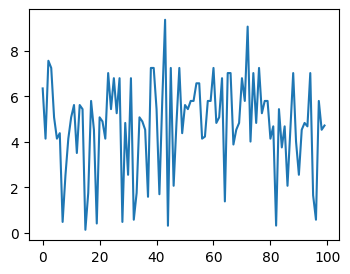

In [42]:
n = 300
plist = [50]
# knum = 4
knum = 5
k=5
N_simulations = 100
true_set = [0,1,2,3,4]

Chosen_svd_set_5 =[]


Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
fig = plt.figure(figsize =(4, 3))
for p in plist:
    def Final(i,p):
        Unionset = []
        np.random.seed(i)
        random.seed(i)
        Z, M, B = create_factors(600, k, p+1, sig=0.8)
    # redefine Z to be all the other columns except the last one
        Z = Z[:, :-1]
        unionset = choose_factor('SGL', Z, knum, train_size=600, svd_C= compute_k_truncated_Z(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
        #    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
        return  unionset
    # N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))
    Results= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))
    N_chosen_set= [Results[i][0] for i in range(N_simulations) ]
    svdC_set0= [Results[i][1] for i in range(N_simulations) ]
    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset) 
        Final_knum.append(len(unionset))
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    def Final(i,p):
        Unionset = []
        np.random.seed(i)
        random.seed(i)
        Z, M, B = create_factors(600, k, p+1, sig=0.8)
    # redefine Z to be all the other columns except the last one
        Z = Z[:, :-1]
        
        unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C= compute_k_truncated_Z(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
        #    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
        return  unionset
    Results= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))
    N_chosen_set= [Results[i][0] for i in range(N_simulations) ]
    svdC_set= [Results[i][1] for i in range(N_simulations) ]
    plt.plot(np.array(svdC_set)/np.array(svdC_set0))
    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset) 
        Final_knum.append(len(unionset))
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
# fig = plt.figure(figsize =(4, 3))
# # Creating axes instance
# ax = fig.add_axes([0, 0, 1, 1])
# x = plist
# plt.grid(linestyle="--", alpha=0.3)
# plt.title('n = 300, k = 5')
# plt.xlabel('number of candidate factors '+ '$ p$')
# plt.ylabel('rate')  # y轴标题
# plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
# plt.plot(x, np.array(CFlist), marker='o', markersize=3)
# plt.plot(x, np.array(TRlist), marker='o', markersize=3)
# plt.plot(x, np.array(FRlist), marker='o', markersize=3)


# plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
# fig.savefig('simu_result/plot_300_5_sgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



Counter({5: 100, 7: 100, 6: 100, 2: 100, 4: 100, 3: 100, 0: 100, 8: 100, 9: 100, 1: 100})
selected factor size: 10.0 CP: 1.0 CF: 0.0 TR: 1.0 FR: 0.5 F1: 0.666667
(10.0, 1.0, 0.0, 1.0, 0.5, 0.666667)


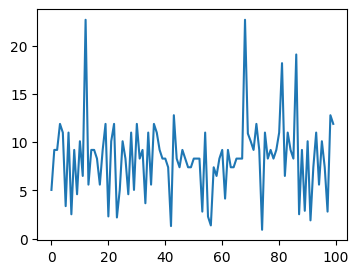

In [ ]:
n = 300
plist = [50]
# knum = 4
knum = 10
k=10
N_simulations = 100
true_set = [0,1,2,3,4]

Chosen_svd_set_5 =[]


Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
fig = plt.figure(figsize =(4, 3))
for p in plist:
    def Final(i,p):
        Unionset = []
        np.random.seed(i)
        random.seed(i)
        Z, M, B = create_factors(600, k, p+1, sig=1)
    # redefine Z to be all the other columns except the last one
        Z = Z[:, :-1]
        unionset = choose_factor('SGL', Z, knum, train_size=600, svd_C= compute_k_truncated_Z(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
        #    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
        return  unionset
    # N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))
    Results= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))
    N_chosen_set= [Results[i][0] for i in range(N_simulations) ]
    svdC_set0= [Results[i][1] for i in range(N_simulations) ]
    
    def Final(i,p):
        Unionset = []
        np.random.seed(i)
        random.seed(i)
        Z, M, B = create_factors(600, k, p+1, sig=1)
    # redefine Z to be all the other columns except the last one
        Z = Z[:, :-1]
        
        unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C= compute_k_truncated_Z(Z,knum)[-1], asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
        #    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
        return  unionset
    Results= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))
    N_chosen_set= [Results[i][0] for i in range(N_simulations) ]
    svdC_set= [Results[i][1] for i in range(N_simulations) ]
    plt.plot(np.array(svdC_set)/np.array(svdC_set0))
    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset) 
        Final_knum.append(len(unionset))
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
# fig = plt.figure(figsize =(4, 3))
# # Creating axes instance
# ax = fig.add_axes([0, 0, 1, 1])
# x = plist
# plt.grid(linestyle="--", alpha=0.3)
# plt.title('n = 300, k = 5')
# plt.xlabel('number of candidate factors '+ '$ p$')
# plt.ylabel('rate')  # y轴标题
# plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
# plt.plot(x, np.array(CFlist), marker='o', markersize=3)
# plt.plot(x, np.array(TRlist), marker='o', markersize=3)
# plt.plot(x, np.array(FRlist), marker='o', markersize=3)


# plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
# fig.savefig('simu_result/plot_300_5_sgl.pdf',dpi=600,format='pdf',bbox_inches="tight")



# other method


[[19, 22], [15], [27], [29], [3], [13, 29, 8, 18, 21, 10], [14, 12, 1, 4, 19, 5, 13, 2, 22, 21, 17, 6, 25, 15, 10, 16, 27, 3, 20, 29, 9, 28, 8], [16], [14], [13], [20], [14, 1, 8, 25, 22, 19, 21, 7, 17, 0, 11, 18, 20, 26, 15, 6, 10, 28, 9, 27, 2, 5], [15], [29], [19], [27], [21], [28], [17], [9], [10, 4, 18, 25, 7, 8, 1, 9, 5, 12, 16, 22, 13, 21, 27, 23, 20], [16], [27], [3], [29, 16, 18], [1, 10, 27, 8, 28, 16, 24, 25, 19, 20, 2, 26, 11, 23, 15, 13, 4, 7, 29, 9, 17, 14, 3, 0, 12], [16], [0], [16], [21], [1], [15], [15], [2], [19, 8, 5, 7, 21, 4, 6, 17, 10, 9, 26, 14, 3, 22, 28, 16, 13, 23, 1, 29, 27, 20], [29], [6], [5], [13], [11], [26], [9], [4], [0], [24], [9], [9], [16, 15, 21, 9, 8, 29, 26, 23, 27, 13, 10, 1, 7, 20, 28, 19, 12, 17, 22, 25, 0, 11, 6, 4], [18], [0, 22, 8, 9, 17, 19, 14, 11, 6, 13, 3, 23, 21, 25, 24, 20, 4, 27, 10], [29], [10], [27], [7, 6, 10, 2, 13, 20, 28, 3, 9, 11], [21], [14], [21], [9], [13], [19], [23], [4, 6], [6], [4], [14], [19], [20], [13], [29], [6], [21

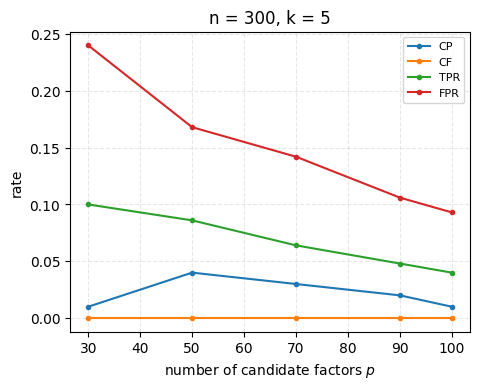

In [65]:
n = 3000
plist = [30,50,70,90,100]
# knum = 4
knum = 5
k=5
N_simulations = 100
true_set = [0,1,2,3,4]

Chosen_svd_set_5 =[]


Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
def Step_SR(X_full0, Lambda, Break):
    T = X_full0.shape[0]
    N = X_full0.shape[1] 
    names = X_full0.columns
    S,t = [],[]
    X_full_subset = X_full0
    # pGRS = p_GRS = p_GRS1 = p_alpha = p_alpha_GRS = p_GRS_asset = qf0 = qf01 = p_PY = p_PY_asset = GRS = qf0 = NULL
    # p_GRS_asset100 = p_GRS_asset500 = p_PY_asset100 = p_PY_asset500 = NULL
    if Break:
        k = N-2
    else:
        k = N-1
        
    model_index = np.empty((k, k+3),dtype=object)
    GRS,qf0,p_alpha,p_GRS,p_PY =[np.zeros(k,dtype=object) for _ in range(5)]
    

    
    for i in range(k):
    
        a = np.where(np.isin(names, S))[0]
            
        X_full= X_full0.values
        if  a is None:
            X_full_subset = X_full
        else:
            X_full_subset =  np.delete(X_full, a, axis=1)
        N_subset = X_full_subset.shape[1]
        names_subset = names[np.where(~np.isin(names, S))[0]]
      
        GRS_k = np.empty((N_subset,1))
        t1 = np.empty((N_subset,1))

        for j in range(N_subset):
            Mj = np.union1d(names_subset[j], S)
   
       
            b = np.where(np.isin(names, Mj))[0]
            X1 = X_full[:,b]
            X2 = np.delete(X_full, b, axis=1)         
            #GRS statistic
            if len(b)==1:
                W1 = 1/np.cov(X1.T)
                mu1 = np.mean(X1)
                SR1 = 1 + mu1.T*W1*mu1
            else:
                W1 = np.linalg.pinv(np.cov(X1.T))
                mu1 = np.mean(X1, axis=0)
                SR1 = 1 + np.dot(np.dot(mu1.T, W1), mu1)
           
            
            F = np.concatenate((X1, X2), axis=1)
            W = np.linalg.pinv(np.cov(F.T))
            mu = np.mean(F, axis=0)
            SR = 1 + np.dot(np.dot(mu.T, W), mu)

            GRS_k[j] = ((T - N) / (N - i)) * (SR / SR1 - 1)
         
        #    
        a1 = names_subset[np.argmin(GRS_k)]
  
        t2 = t1[np.argmin(GRS_k)]
       
        if Break :
           
            if i:  
                X1 = X_full0[S].values
                X2 = X_full0[a1].values
                model = sm.OLS(X2, sm.add_constant(X1))
                p_alphai = model.fit().pvalues[0]  
            else:
                p_alphai = 0
            
            p_alpha[i]=p_alphai
            
            S.append(a1)
            model_index[i,:i+1] = S
            b1 = np.where(np.isin(names, S))[0]
            F1 = X_full[:,b1]
            F2 = np.delete(X_full, b, axis=1)
       
            ### GRS no test asset
            result1 = GRS_test(F1, F2, [[False]], Lambda)
            p_GRSi = result1[0]
            p_GRS[i]=p_GRSi
      
            ### PY no test asset
            result3 = PY_test(F1, F2, [[False]])
            p_PYi = result3[0]
            p_PY[i]=p_PYi
             
            
            p_value = [p_alphai, p_GRSi, p_PYi]
       
            if min(p_value) > Lambda and i > 1:
        
                break    
        else:
            t.append(t2)
            S.append(t1)
            print(t1)
            model_index[i, :i] = S
            GRSi = GRS_k[np.where(GRS_k == np.min(GRS_k))]
            GRS[i]=GRSi
            qf0i = 1 - f.cdf(GRSi, N - i, T - N)
            qf0[i]=qf0i
            if len(S) == 1:
                
                X_SR = X_full0[S].values
                SR = np.mean(X_SR) / np.std(X_SR)
            else:
                X_SR = X_full0[S].values
                W1 = np.linalg.pinv(np.cov(F1))
                mu1 = np.mean(F1, axis=0)
                SR = np.sqrt(mu1 @ W1 @ mu1.T)
            
            model_index[i, (k + 1)] = GRSi
            model_index[i, (k + 2)] = qf0i
            model_index[i, (k + 3)] = SR * np.sqrt(12)
    if Break:
        
        P_all = np.column_stack((p_alpha, p_GRS, p_PY))
        model_result = np.empty_like(P_all,dtype=object)
        for z in range(P_all.shape[1]):
           
            m11 = np.where(P_all[:, z]> Lambda)[0]
          
            if len(m11) > 0 and z < 1:
                m1 = np.min(m11)
                # model_result[:(m1-1), z] = model_index[m1-1, :(m1-1)]
           
                model_result[:(m1), z] = model_index[m1, :m1]
            elif len(m11) > 0 and z > 0:
                m1 = np.min(m11)
                # model_result[:m1, z] = model_index[m1-1, :m1]
                model_result[:m1+1, z] = model_index[m1, :m1+1]
            else:
                model_result[:model_result.shape[0], z] = model_index[model_index.shape[0]-1, :model_result.shape[0]]
            result = model_result[:,-1]
        return result[result!=None]
        # return [model_result, P_all]
    else:
      
        S_full =  X_full0[S].values
        model_index11 = model_index[:i, np.concatenate((np.arange(0, i), [k+1, k+2, k+3]))]
        return [S_full,model_index11, GRS, qf0, S]  

for p in plist:
    
    def Final(i,p):
        Unionset = []
        np.random.seed(i)
        random.seed(i)
        Z, M, B = create_factors(600, k, p+1, sig=1)
    # redefine Z to be all the other columns except the last one
        Z = Z[:, :-1]
        unionset = Step_SR(pd.DataFrame(Z), 0.1, True)
        #    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
        return  unionset
    Results= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))
    N_chosen_set= [list(Results[i]) for i in range(N_simulations) ]
 
    print(N_chosen_set)
    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset) 
        Final_knum.append(len(unionset))
        
    result=evaluate(num_chosen_set,N_simulations) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 300, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
# fig.savefig('simu_result/plot_300_5_sgl.pdf',dpi=600,format='pdf',bbox_inches="tight")

